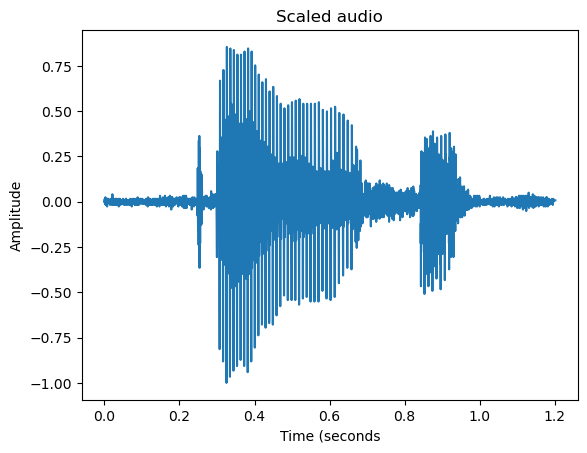

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
#audio file load
Fs,y= wavfile.read ('./Kuusi.wav')
#double or float convert
y= y.astype(float)
y= y - np.mean(y)
# Scaling
y= y / np.max(np.abs(y))
t= np.arange(len(y)) / Fs
plt.plot(t,y)
plt.title("Scaled audio")
plt.xlabel("Time (seconds")
plt.ylabel("Amplitude")
plt.show()


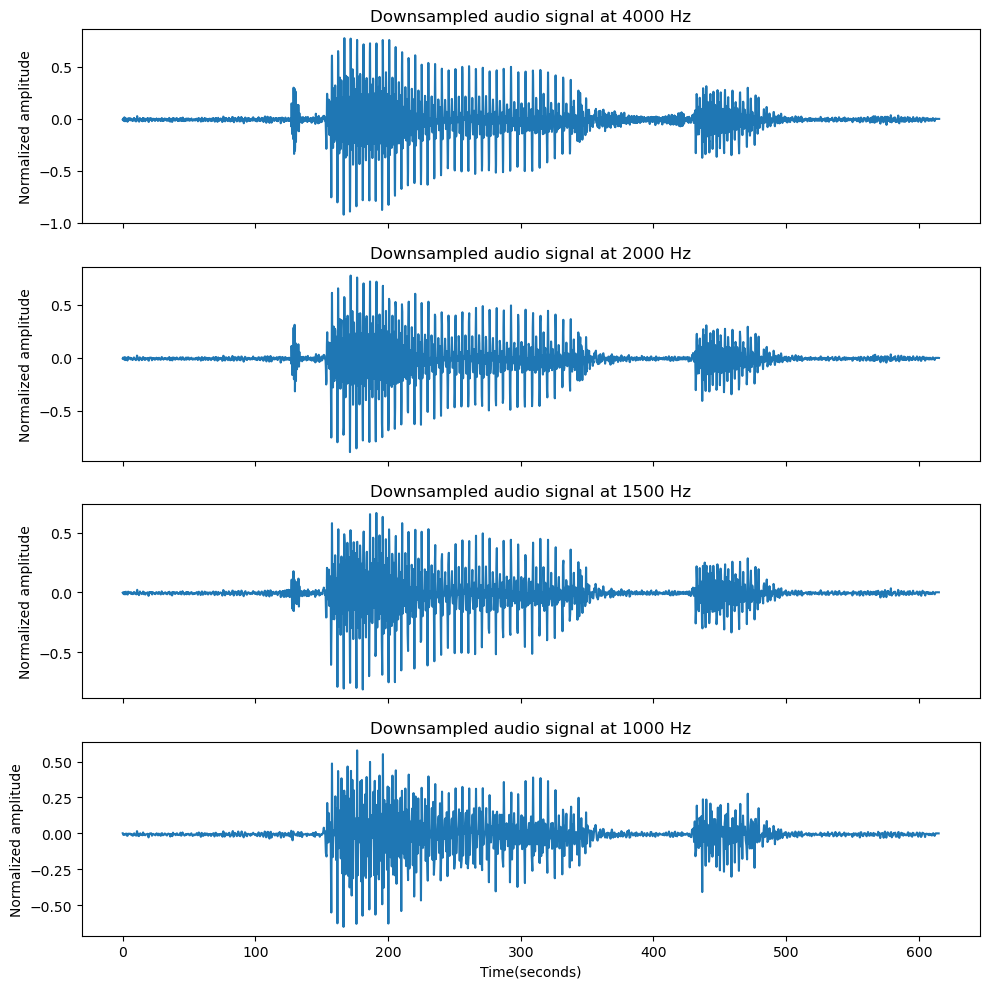

Playing Kuusi audio signal at 4000 Hz.......
Playing Kuusi audio signal at 2000 Hz.......
Playing Kuusi audio signal at 1500 Hz.......
Playing Kuusi audio signal at 1000 Hz.......


In [2]:
import librosa
import sounddevice as sd
import matplotlib.pyplot as plt
import time
y, sr_original= librosa.load('Kuusi.wav', sr=8000)  
downsample =[4000, 2000, 1500, 1000]
signal_downsample= []

for sr in downsample:
    y_change, _ = librosa.load('Kuusi.wav', sr=sr)
    signal_downsample.append((y_change, sr))
# Plot
fig, axes = plt.subplots(len(downsample), 1, figsize=(10, 10), sharex=True)

for i,(y_change, sr) in enumerate(signal_downsample):
    t =  librosa.times_like(y_change, sr=sr)
    axes[i].plot(t,  y_change)
    axes[i].set_title( f'Downsampled audio signal at {sr} Hz')
    axes[i].set_ylabel( 'Normalized amplitude')

plt.xlabel ('Time(seconds)')
plt.tight_layout()
plt.show()

# Play
for y_change,sr in signal_downsample:
    print (f"Playing Kuusi audio signal at {sr} Hz.......")
    sd.play(y_change, sr)
    sd.wait()


800
(800,)


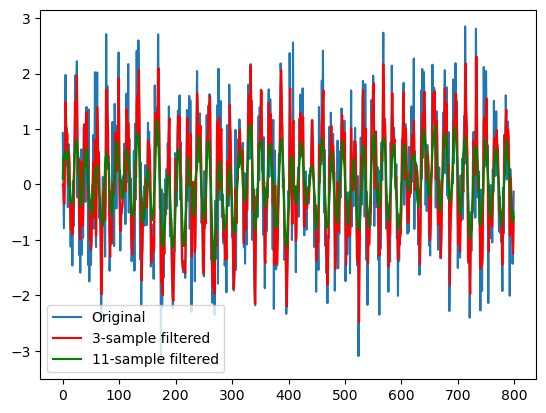

In [6]:
#average_filter.py
#Jari Turunen, TUNI
import numpy as np
from numpy import cos, sin, pi, absolute, arange, mean
from matplotlib import pyplot as plt
from scipy.stats import skew,kurtosis
fs=8000     #sampling frequency Hz
freq=440	#Hertz
end_time = 0.1
time = np.arange(0,end_time,1/fs)  # start, stop, step #time series vector
print(len(time))
y=sin(2*pi*freq*time)+np.random.normal(loc=0.0, scale=0.8, size=[1, len(time)]) #sine curve + added gaussian noise
y=y.squeeze()
print(y.shape)

len1=1 #length of the average filter (trend) (1+2*len)=window size
len2=5 #longer trend (1+2*len2)
x=y*0	#fast initialization
x2=y*0
#x3=x2
#x4=x2
for i in range(len(y)):
	#print("%d / %d\n" % (i,len(y)))
	start=i-len1
	if start<1: #for initializing the window
		start=1
	start2=i-len2
	if start2<1: #for initializing the window2
		start2=1

	ending=i+len1    
	if ending>len(y):   #taking care of the 
		ending=len(y)	#end of the window

	ending2=i+len2    
	if ending2>len(y):  #taking care of the 
		ending2=len(y) 	#end of the window2

	if len(y[start:ending])<2:
		x[i]=0
	else:
		x[i]=np.mean(y[start:ending])  #sliding window mean
	if len(y[start2:ending2])<2:
		x2[i]=0
	else:
		x2[i]=np.mean(y[start2:ending2]) #sliding window mean
		#x3[i]=skew(y[start2:ending2],axis=0, bias=True)
		#x4[i]=kurtosis(y[start2:ending2],axis=0, bias=True)



plt.plot(y)
plt.plot(x,'r')
plt.plot(x2,'g') #plot the results
#plt.plot(x3,'b')
#plt.plot(x4,'y') #plot the results
plt.legend(['Original','3-sample filtered','11-sample filtered'])
plt.show()